### подключение необходимых пакетов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook 
import os
import cv2
import tensorflow as tf


### чтение файлов из папок. название папок сохранено как и в zip файле 

In [2]:
home=os.getcwd()
print(home)
train_big_list=os.listdir("train/big")
train_small_list=os.listdir("train/small")
test_big_list=os.listdir("test/big")
test_small_list=os.listdir("test/small")

way=[home+'/train/big/',home+'/train/small/',home+'/test/big/',home+'/test/small/']

C:\Users\USER\ML\CV_task


### запись данных в масивы. произведено сжатие изображений и их нормировка
### используемые метки: 1 - для больших обьектов; 0- для маленьких

In [3]:
n=100 # размер записываемых изображений
data_train=[]
data_test=[]
for i in train_big_list:
    with cbook.get_sample_data(way[0]+i) as image_file:
        image = plt.imread(image_file)
        image= cv2.resize(image,(n,n))
        image = (image/255.0).astype(np.float32)
#        print(image.dtype)
        data_train.append((image,1))
#        

for i in train_small_list:
    with cbook.get_sample_data(way[1]+i) as image_file:
        image = plt.imread(image_file)
        image= cv2.resize(image,(n,n))
        image = (image/255.0).astype(np.float32)
        data_train.append((image,0))

for i in test_big_list:
    with cbook.get_sample_data(way[2]+i) as image_file:
        image = plt.imread(image_file)
        image= cv2.resize(image,(n,n))
        image = (image/255.0).astype(np.float32)
        data_test.append((image,1))

for i in test_small_list:
    with cbook.get_sample_data(way[3]+i) as image_file:
        image = plt.imread(image_file)
        image= cv2.resize(image,(n,n))
        image = (image/255.0).astype(np.float32)
        data_test.append((image,0))

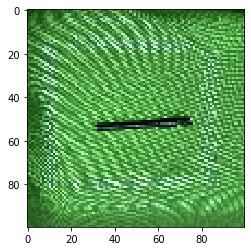

In [4]:
plt.imshow(data_train[2][0])

### перемешивание данных и меток. разделение их на numpy.array 

In [ ]:
random.shuffle(data_train)
random.shuffle(data_test)
print(len(data_train))
x_train=np.zeros((len(data_train),n,n,3))
y_train=np.zeros(len(data_train))
x_test=np.zeros((len(data_test),n,n,3))
y_test=np.zeros(len(data_test))
for elem in range(len(data_train)) :
    q=data_train.pop(0)
    x_train[elem]=q[0]
    y_train[elem]=q[1]
for elem in range(len(data_test)) :
    q=data_test.pop(0)
    x_test[elem]=q[0]
    y_test[elem]=q[1]

### структура модели. для распознавания применены CNN сеть

In [27]:
def model_body():
    input_tensor=tf.keras.Input(shape=(n,n,3,))
    x=tf.keras.layers.RandomFlip()(input_tensor)
    x=tf.keras.layers.RandomRotation(0.25)(x)
    x=tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(x)
    x=tf.keras.layers.MaxPooling2D()(x)
    x=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
    x=tf.keras.layers.MaxPooling2D()(x)
    x=tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x=tf.keras.layers.MaxPooling2D()(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(1,activation='sigmoid')(x)
    model= tf.keras.Model(input_tensor,x,name="Classifier")
    return model
model=model_body()
print(model.output_shape )

(None, 1)


### обучение модели 

In [33]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy')
model.fit(x_train,y_train,validation_split=0.1,batch_size=1,epochs=150)


Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/38 [============================>.] - ETA: 0s - loss: 0.0033 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002064B6FB8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

38/38 [==============================] - 0s 9ms/step - loss: 3.2249e-05 - val_loss: 2.4241e-05
Epoch 60/150
38/38 [==============================] - 0s 9ms/step - loss: 3.0298e-05 - val_loss: 2.2507e-05
Epoch 61/150
38/38 [==============================] - 0s 9ms/step - loss: 8.0258e-05 - val_loss: 2.5515e-05
Epoch 62/150
38/38 [==============================] - 0s 9ms/step - loss: 3.1428e-04 - val_loss: 8.0119e-05
Epoch 63/150
38/38 [==============================] - 0s 9ms/step - loss: 1.4427e-04 - val_loss: 6.3376e-05
Epoch 64/150
38/38 [==============================] - 0s 9ms/step - loss: 3.6789e-05 - val_loss: 3.8887e-05
Epoch 65/150
38/38 [==============================] - 0s 10ms/step - loss: 3.4658e-05 - val_loss: 3.2110e-05
Epoch 66/150
38/38 [==============================] - 0s 9ms/step - loss: 9.7326e-05 - val_loss: 2.1132e-05
Epoch 67/150
38/38 [==============================] - 0s 9ms/step - loss: 6.2739e-05 - val_loss: 1.9928e-05
Epoch 68/150
38/38 [====================

38/38 [==============================] - 0s 9ms/step - loss: 4.0552e-06 - val_loss: 7.2356e-07
Epoch 135/150
38/38 [==============================] - 0s 9ms/step - loss: 1.8824e-05 - val_loss: 5.2199e-07
Epoch 136/150
38/38 [==============================] - 0s 9ms/step - loss: 2.4159e-05 - val_loss: 2.5376e-07
Epoch 137/150
38/38 [==============================] - 0s 9ms/step - loss: 4.3937e-05 - val_loss: 9.2589e-07
Epoch 138/150
38/38 [==============================] - 0s 9ms/step - loss: 5.3549e-06 - val_loss: 9.4203e-07
Epoch 139/150
38/38 [==============================] - 0s 9ms/step - loss: 4.4901e-06 - val_loss: 8.7303e-07
Epoch 140/150
38/38 [==============================] - 0s 9ms/step - loss: 4.6889e-06 - val_loss: 8.1252e-07
Epoch 141/150
38/38 [==============================] - 0s 9ms/step - loss: 6.5292e-06 - val_loss: 7.0429e-07
Epoch 142/150
38/38 [==============================] - 0s 9ms/step - loss: 5.9172e-06 - val_loss: 5.7375e-07
Epoch 143/150
38/38 [============

### ниже приведена ошибка на тестовых данных. как можно видеть можель абсолютно точно предсказала все тестовые метки

In [35]:
print(model.evaluate(x_test,y_test))
predict=model.predict(x_test)
predict=tf.transpose(tf.round(predict))
print(predict)
print(y_test)
print(y_test-predict)

1/1 [==============================] - 0s 45ms/step - loss: 1.9309e-06
1.930853841258795e-06
tf.Tensor([[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]], shape=(1, 21), dtype=float32)
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 21), dtype=float32)


In [56]:
model.save_weights(home +"/save_model/")